In [1]:
#импорт необходимых библиотек

import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pd_reader

In [2]:
#библиотека yahoo

import yfinance as yf
tickers0 = ['DSKY.ME', 'GAZP.ME', 'VTBR.ME', 'PIKK.ME', 'ROSN.ME']
df_stocks0 = yf.download(tickers0, start='2021-01-01', end='2021-12-31')['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [3]:
stocks0 = pd.DataFrame(df_stocks0)
stocks0

,DSKY.ME,GAZP.ME,PIKK.ME,ROSN.ME,VTBR.ME
Date,,,,,
2021-01-04,126.034470,205.652847,569.555725,421.337891,0.035910
2021-01-05,125.426590,205.212463,573.473816,428.101959,0.036136
2021-01-06,125.131859,206.026230,570.129089,434.578217,0.036240
2021-01-08,125.131859,206.026230,570.129089,434.578217,0.036240
2021-01-11,123.050331,217.715729,566.688843,454.246704,0.037305
...,...,...,...,...,...
2021-12-24,124.459999,338.250000,1003.900024,573.000000,0.047100
2021-12-27,124.980003,342.779999,1021.000000,581.500000,0.047810
2021-12-28,124.379997,345.000000,1040.000000,595.500000,0.048260


In [4]:
#посчитаем среднюю доходность акций за выбранный период

#для этого импортируем необходимые компоненты библиотеки 
from pypfopt.expected_returns import mean_historical_return

mu0 = mean_historical_return(stocks0)
mu0

DSKY.ME   -0.009124
GAZP.ME    0.661929
PIKK.ME    0.936429
ROSN.ME    0.419214
VTBR.ME    0.340679
dtype: float64

In [5]:
#проверим доходность Магнита

tickers1 = ['MGNT.ME']
df_stocks1 = yf.download(tickers1, start='2021-01-01', end='2021-12-31')['Adj Close']
stocks1 = pd.DataFrame(df_stocks1)
mu1 = mean_historical_return(stocks1)
mu1

[*********************100%***********************]  1 of 1 completed


Adj Close    0.153322
dtype: float64

[*********************100%***********************]  5 of 5 completed
               GAZP.ME      MGNT.ME      PIKK.ME     ROSN.ME   VTBR.ME
Date                                                                  
2021-01-04  205.652847  4717.173828   569.555725  421.337891  0.035910
2021-01-05  205.212463  4706.097656   573.473816  428.101990  0.036136
2021-01-06  206.026230  4723.505371   570.129089  434.578217  0.036240
2021-01-08  206.026230  4723.505371   570.129089  434.578217  0.036240
2021-01-11  217.715729  4688.364258   566.688843  454.246704  0.037305
...                ...          ...          ...         ...       ...
2021-12-24  338.250000  5004.343262  1003.900024  573.000000  0.047100
2021-12-27  342.779999  5083.684570  1021.000000  581.500000  0.047810
2021-12-28  345.000000  5062.168457  1040.000000  595.500000  0.048260
2021-12-29  339.489990  5139.129883  1075.000000  591.750000  0.048090
2021-12-30  342.470001  5443.500000  1105.800049  598.799988  0.048200

[254 ro

<AxesSubplot:>

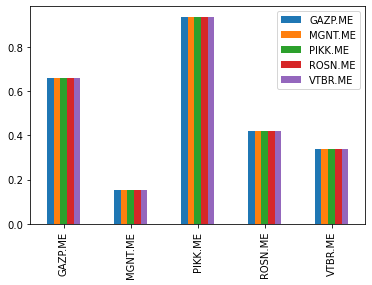

In [6]:
#скачаем финальные котировки для анализа

tickers = ['MGNT.ME', 'GAZP.ME', 'VTBR.ME', 'PIKK.ME', 'ROSN.ME']
df_stocks = yf.download(tickers, start='2021-01-01', end='2021-12-31')['Adj Close']
stocks = pd.DataFrame(df_stocks)
print(stocks)
print('---------------------------')
#посчитаем среднюю годовую доходность
mu = mean_historical_return(stocks)
print(mu)
print('---------------------------')
#график средних годовых доходностей акций
df_stocks.pct_change().apply(lambda x: mu).plot(kind='bar')

             GAZP.ME   MGNT.ME   PIKK.ME   ROSN.ME   VTBR.ME
Date                                                        
2021-01-04       NaN       NaN       NaN       NaN       NaN
2021-01-05 -0.002141 -0.002348  0.006879  0.016054  0.006299
2021-01-06  0.003965  0.003699 -0.005832  0.015128  0.002869
2021-01-08  0.000000  0.000000  0.000000  0.000000  0.000000
2021-01-11  0.056738 -0.007440 -0.006034  0.045259  0.029389
-------------------------------------------------------------------
GAZP.ME    0.000218
MGNT.ME    0.000209
PIKK.ME    0.000438
ROSN.ME    0.000241
VTBR.ME    0.000314
dtype: float64
-------------------------------------------------------------------
GAZP.ME    0.014771
MGNT.ME    0.014442
PIKK.ME    0.020931
ROSN.ME    0.015528
VTBR.ME    0.017712
dtype: float64


<AxesSubplot:>

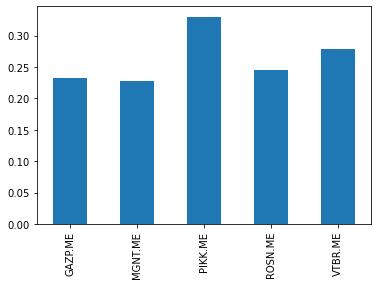

In [7]:
#выведем дисперсию дневных доходностей акций
#для этого посчитаем дневное процентное изменение цен
df_stocks_perc = df_stocks.pct_change()
print(df_stocks_perc.head())

print('-------------------------------------------------------------------')
#теперь посчитаем дисперсию от процентного изменения цен
var_p = df_stocks_perc.var(ddof=0)
print(var_p)

print('-------------------------------------------------------------------')
#выведем стандартное отклонение доходностей акций
#для этого можем воспользоваться втроенной функцией 
std_p = df_stocks_perc.std(ddof = 0)
print(std_p)
#или просто взять корень от дисперсии, которую мы посчитали выше
#std1 = np.sqrt(var_p)
#print(std1)


#выведем графики дисперсии в процентом соотношении для лучшего понимания
df_stocks.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

In [8]:
#выведем ковариационную матрицу
cov = df_stocks_perc.cov(min_periods=None, ddof=0)
cov

,GAZP.ME,MGNT.ME,PIKK.ME,ROSN.ME,VTBR.ME
GAZP.ME,0.000219,0.000061,-0.000001,0.000140,0.000123
MGNT.ME,0.000061,0.000209,0.000034,0.000078,0.000077
PIKK.ME,-0.000001,0.000034,0.000440,-0.000005,0.000069
ROSN.ME,0.000140,0.000078,-0.000005,0.000242,0.000104
VTBR.ME,0.000123,0.000077,0.000069,0.000104,0.000315


In [9]:
#выведем корреляционную матрицу
corr = df_stocks_perc.corr()
corr

,GAZP.ME,MGNT.ME,PIKK.ME,ROSN.ME,VTBR.ME
GAZP.ME,1.000000,0.286579,-0.003258,0.609326,0.469176
MGNT.ME,0.286579,1.000000,0.113317,0.345834,0.301002
PIKK.ME,-0.003258,0.113317,1.000000,-0.015387,0.186727
ROSN.ME,0.609326,0.345834,-0.015387,1.000000,0.375722
VTBR.ME,0.469176,0.301002,0.186727,0.375722,1.000000


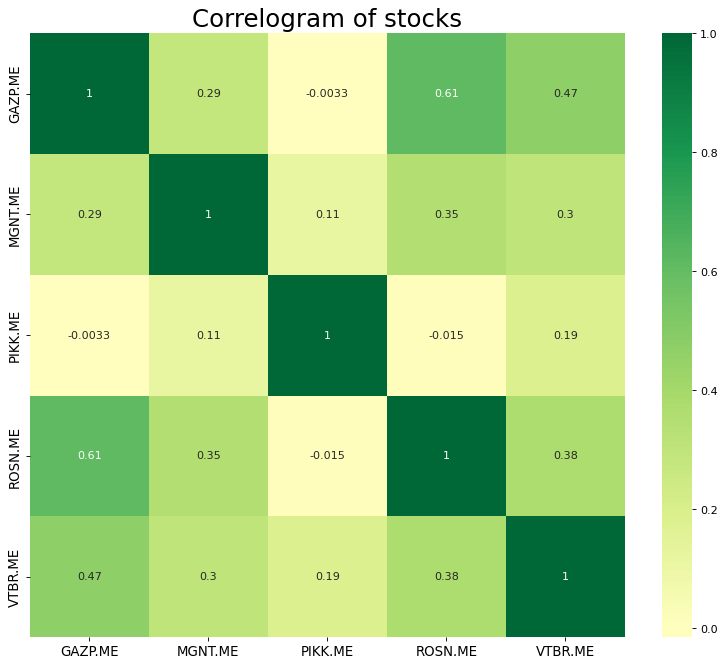

In [10]:
#выведем график корреляции

import seaborn as sns

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_stocks_perc.corr(), xticklabels=df_stocks_perc.corr().columns, yticklabels=df_stocks_perc.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of stocks', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [11]:
#перед построением оптимального портфеля попробуем посмотреть на портфель с заданными веса
#возьмем вес каждой акции = 0.2 
w0 = [0.2, 0.2, 0.2, 0.2, 0.2]
#для определения ожидаемой доходности портфеля нужно умножить среднюю доходность каждой акции на ее долю и сложить результаты
return0 = (w0 * mu).sum()
return00 = return0 * 100
print('Доходность тестового портфеля с равными долями равна:', round(return00, 1), '%')
#определим дисперсию нашего портфеля
var00 = cov.mul(w0, axis=0).mul(w0, axis=1).sum().sum()
print('Дисперсия тестового портфеля с равными долями равна:', round(var00, 5))


Доходность тестового портфеля с равными долями равна: 50.2 %
Дисперсия тестового портфеля с равными долями равна: 0.00011


In [12]:
#выведем таблицу с данными о наших активах: ожидаемая доходность и стандартное отклонение процентного изменения цены
assets = pd.concat([mu, std_p], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
GAZP.ME,0.661929,0.014771
MGNT.ME,0.153322,0.014442
PIKK.ME,0.936429,0.020931
ROSN.ME,0.419214,0.015528
VTBR.ME,0.340679,0.017712


In [13]:
#чтобы построить кривую оптимальных портфелей необходимо запустить цикл, который переберет различные доли активов и выведет значения портфелей с соотв долями
#проверим на 1000 различных итераций. в качестве долей укажем рандомные числа

p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df_stocks.columns)
num_portfolios = 10000

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, mu) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)


data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df_stocks.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,GAZP.ME weight,MGNT.ME weight,PIKK.ME weight,ROSN.ME weight,VTBR.ME weight
0,0.551791,0.164507,0.330238,0.298356,0.260992,0.069226,0.041188
1,0.421184,0.175525,0.132117,0.549915,0.235519,0.009963,0.072486
2,0.562397,0.184718,0.165766,0.056278,0.280846,0.148931,0.348179
3,0.495186,0.167468,0.225739,0.215833,0.184853,0.156612,0.216964
4,0.413425,0.171942,0.106848,0.299494,0.106616,0.394947,0.092095


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

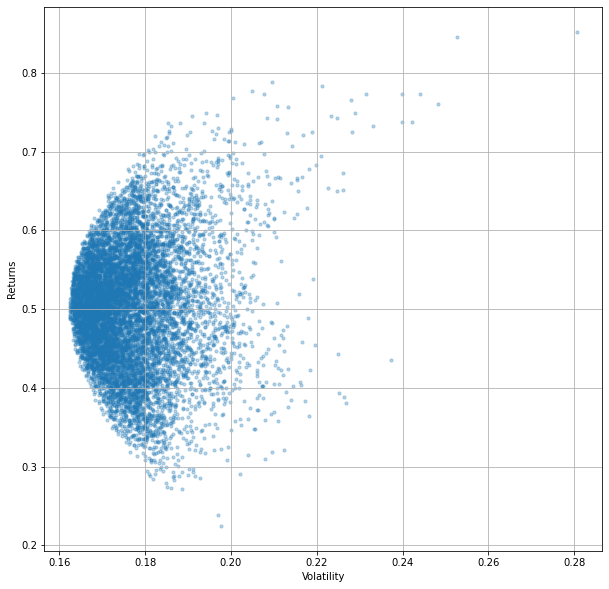

In [14]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

Returns           0.497349
Volatility        0.162383
GAZP.ME weight    0.241569
MGNT.ME weight    0.312463
PIKK.ME weight    0.208481
ROSN.ME weight    0.170704
VTBR.ME weight    0.066783
Name: 3655, dtype: float64


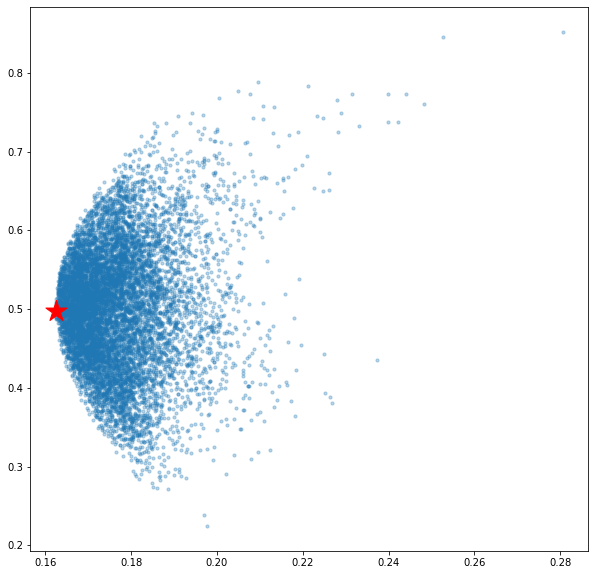

In [15]:
#найдем портфель и доли акций в нем с минимальной дисперсией (наименее рисковый портфель)
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
print(min_vol_port)
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

Returns           0.735893
Volatility        0.185241
GAZP.ME weight    0.506834
MGNT.ME weight    0.011421
PIKK.ME weight    0.380369
ROSN.ME weight    0.100956
VTBR.ME weight    0.000419
Name: 3881, dtype: float64


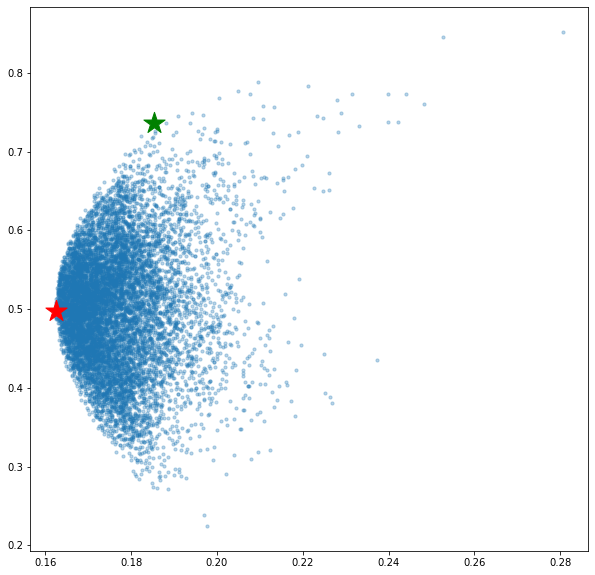

In [16]:
#найдем оптимальный портфель по Шарпу. Для этого нужно задать безрисковую ставку. Предположим, эта ставка равна 3%
rf = 0.03 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_portrf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
print(optimal_risky_port)
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [17]:
#источники 
#https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/
#https://habr.com/ru/post/561980/?

In [18]:
#загрузим отчетности: 1_1 - бухгалтерский баланс Газпрома, 1_2 - отчет о фин результатах Газпрома. Первый аргумент - номер компании, второй аргумент - бух баланс или отчет о фин рез
gazp = 'gazp'
mgnt = 'mgnt'
pikk = 'pikk'
rosn = 'rosn'
vtbr = 'vtbr'

path_1_1 = 'C:\\Users\\kirik\\Desktop\\кейс\\отчетности\\%s\\report_1.csv' % gazp 
path_1_2 = 'C:\\Users\\kirik\\Desktop\\кейс\\отчетности\\%s\\report_2.csv' % gazp 
path_2_1 = 'C:\\Users\\kirik\\Desktop\\кейс\\отчетности\\%s\\report_1.csv' % mgnt
path_2_2 = 'C:\\Users\\kirik\\Desktop\\кейс\\отчетности\\%s\\report_2.csv' % mgnt 
path_3_1 = 'C:\\Users\\kirik\\Desktop\\кейс\\отчетности\\%s\\report_1.csv' % pikk 
path_3_2 = 'C:\\Users\\kirik\\Desktop\\кейс\\отчетности\\%s\\report_2.csv' % pikk 
path_4_1 = 'C:\\Users\\kirik\\Desktop\\кейс\\отчетности\\%s\\report_1.csv' % rosn 
path_4_2 = 'C:\\Users\\kirik\\Desktop\\кейс\\отчетности\\%s\\report_2.csv' % rosn 
path_5_1 = 'C:\\Users\\kirik\\Desktop\\кейс\\отчетности\\%s\\report_1.csv' % vtbr 
path_5_2 = 'C:\\Users\\kirik\\Desktop\\кейс\\отчетности\\%s\\report_2.csv' % vtbr 


In [19]:
#несколько преобразуем наши данные
a1 = 'Unnamed: 1'
a2 = 'Unnamed: 2'
a3 = 'Unnamed: 3'
a4 = 'Unnamed: 4'
b1 = 'code'
b2 = '2022'
b3 = '2021'
b4 = '2020'

gazp1 = pd.read_csv(path_1_1, delimiter=';', on_bad_lines='skip') 
gazp2 = pd.read_csv(path_1_2, delimiter=';', on_bad_lines='skip') 
mgnt1 = pd.read_csv(path_2_1, delimiter=';', on_bad_lines='skip') 
mgnt2 = pd.read_csv(path_2_2, delimiter=';', on_bad_lines='skip') 
pikk1 = pd.read_csv(path_3_1, delimiter=';', on_bad_lines='skip') 
pikk2 = pd.read_csv(path_3_2, delimiter=';', on_bad_lines='skip') 
rosn1 = pd.read_csv(path_4_1, delimiter=';', on_bad_lines='skip') 
rosn2 = pd.read_csv(path_4_2, delimiter=';', on_bad_lines='skip') 
vtbr1 = pd.read_csv(path_5_1, delimiter=';', on_bad_lines='skip') 
vtbr2 = pd.read_csv(path_5_2, delimiter=';', on_bad_lines='skip') 

docs_list = [gazp1, gazp2, mgnt1, mgnt2, pikk1, pikk2, rosn1, rosn2, vtbr1, vtbr2]

for i in docs_list:

    i = i.rename(columns={a1:b1, a2:b2, a3:b3, a4:b4}, inplace=True)

gazp2

,"ПАО ""ГАЗПРОМ""",code,2022,2021
0,NaN,NaN,NaN,NaN
1,Отчет о финансовых результатах,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,Форма № 2 по ОКУД,NaN,Отчетный период,2021
4,ОКВЭД (КДЕС Ред. 2),46.71,Единица измерения,1 x 1000 руб.
5,ИНН,7736050003,Источник данных,Раскрытие
6,NaN,NaN,NaN,NaN
7,Наименование показателя,Код стр.,За отчетный период,За аналогичный период предыдущего года
8,Выручка,2110,6 388 987 167,4 061 444 118
9,Себестоимость продаж,2120,2 748 528 303,2 488 200 192


In [20]:
#посчитаем EPS наших компаний
#для этого с сайта ММВБ узнаем объем выпуска обыкновенных акций 
gazp_n = 23673512900
mgnt_n = 101911355
pikk_n = 660497344
rosn_n = 10598177817
vtbr_n = 12960541337338
stocks_n = [gazp_n, mgnt_n, pikk_n, rosn_n]

In [21]:
#для расчета коэффициента EPS нужно ЧП (2400) разделить на количество акций
finres = [gazp2, mgnt2, pikk2, rosn2]
chist_p = []
for i in finres:
    rows, cols = np.where((i == '2400'))
    aaa = i.iat[int(rows), int(cols + 1)]
    bbb = int(aaa.replace(' ', '')) 
    chist_p.append(bbb)
    
eps = np.array(chist_p) / np.array(stocks_n)

#нашли для всех компаний, кроме ВТБ
#найдем для ВТБ
rows, cols = np.where((vtbr2 == 'Прибыль после налогообложения'))
aaa1 = vtbr2.iat[int(rows), int(cols + 1)]
bbb1 = int(aaa1.replace(' ', '')) 
eps_vtbr = bbb1 / vtbr_n

a = []
eps_vtbr = (round(eps_vtbr, 8))
a.append(eps_vtbr)
eps = np.append(eps, a)

#объеденим значения
#получили строку со значениями eps
earn_p_share = []
for i in range(5):
    m = round(eps[i], 3)
    earn_p_share.append(m)
earn_p_share

[0.113, 0.56, 0.054, 0.057, 0.005]

In [22]:
#показатель P/E = (кол-во акций * рын цена акций) / ЧП
#можем переписать так РЕ = (кол-во акций / ЧП ) * рын стоимость акций
# или так PE = ( 1 / EPS ) * рыночная цена акций

#получим рыночные цены акций. для этого нам нужно найти последнюю цену на отчетную дату
prices = stocks.tail(1)

a = []
for i in range(5):
    a.append(prices.iat[0, i])
prices = a

#умножим цены на коэффициент (1 / eps)
pr_eqt1 = (1 / eps) * prices

price_eqt = []
for i in range(5):
    m = round(pr_eqt1[i], 3)
    price_eqt.append(m)
price_eqt

[3020.152, 9719.038, 20503.83, 10525.578, 9.042]

In [23]:
#Показатель P/B (Price-to-Book Ratio, P/B)
# (Рыночная стоимость компании ) / (балансовая стоимость)

#рыночная стоимость = колво - акций * их стоимость 
#балансоая стоимость = активы - долгосрочные обязательства - краткосрочные обязательства 
#Оптимальным считается значение P/B в диапазоне 1-5. Если мультипликатор больше 5, то это говорит о том, что акции переоценены, а если меньше 1, то недооценены

#рыночная стоимость компании 
#перемножим кол-во акций на их стоимости
gazp_n = 23673512900
mgnt_n = 101911355
pikk_n = 660497344
rosn_n = 10598177817
vtbr_n = 12960541337338
stocks_num = [gazp_n, mgnt_n, pikk_n, rosn_n, vtbr_n]
mar_cap = np.array(stocks_num) * np.array(prices)

#балансовая стоимость (строки) = 1600 - 1400 - 1500
balance = [gazp1, mgnt1, pikk1, rosn1]
bal_cap = []
for i in balance:
    rows, cols = np.where((i == '1600'))
    blc1 = i.iat[int(rows), int(cols + 1)]
    c1c1 = int(blc1.replace(' ', '')) 
    rows, cols = np.where((i == '1400'))
    blc1 = i.iat[int(rows), int(cols + 1)]
    c1c2 = int(blc1.replace(' ', '')) 
    rows, cols = np.where((i == '1500'))
    blc1 = i.iat[int(rows), int(cols + 1)]
    c1c3 = int(blc1.replace(' ', '')) 
    bal_cap.append((c1c1 - c1c2 - c1c3))
    
p_b1 = mar_cap[:-1] / bal_cap
prices

[342.4700012207031,
 5443.5,
 1105.800048828125,
 598.7999877929688,
 0.04820000007748604]

In [24]:
#повторим для ВТБ
#рыночная стоимость
#количество акций на их стоимость 
mar_cap_vtb = vtbr_n * prices[-1]

#балансовая стоимость = Всего источников собственных средств

blsh = vtbr1.iat[35, 1]
blsh1 = int(blsh.replace(' ', '')) 
p_b2 = mar_cap_vtb / blsh1
p_b2

#объеденим значения
l = []
p_b2 = (round(p_b2, 8))
l.append(p_b2)
price_book1 = np.append(p_b1, p_b2)


#получили строку со значениями price / book
price_book = []
for i in range(5):
    m = round(price_book1[i], 3)
    price_book.append(m)
price_book

[597.899, 4273.175, 10905.007, 2475.972, 0.46]

In [68]:
#объеденим результаты в таблицу
table1 = pd.DataFrame( [ ['Gazprom', 'Magnit', 'Pikk', 'RosNeft', 'VTB'],mar_cap, prices, earn_p_share, price_eqt, price_book], columns=['Gazprom', 'Magnit', 'Pikk', 'RosNeft', 'VTB'])
table1[' '] = ['Акция', 'Капитализация', 'Цена акции', 'EPS', 'P/E', 'P/B']
table2 = table1[[' ', 'Gazprom', 'Magnit', 'Pikk', 'RosNeft', 'VTB']]
table2.T

,0,1,2,3,4,5
,Акция,Капитализация,Цена акции,EPS,P/E,P/B
Gazprom,Gazprom,8107467991761.331055,342.470001,0.113,3020.152,597.899
Magnit,Magnit,554754460942.5,5443.5,0.56,9719.038,4273.175
Pikk,Pikk,730377995246.046875,1105.800049,0.054,20503.83,10905.007
RosNeft,RosNeft,6346188747447.3125,598.799988,0.057,10525.578,2475.972
VTB,VTB,624698093463.952637,0.0482,0.005,9.042,0.46


In [46]:
#перейдем к заполнению таблицы 2

#показатель EV/S
ev_s = mar_cap / price_book1

#показатель EVs / EBITDA  (строка 2300)
finres = [gazp2, mgnt2, pikk2, rosn2]
ebitda1 = []
for i in finres:
    rows, cols = np.where((i == '2300'))
    aaa = i.iat[int(rows), int(cols + 1)]
    bbb = int(aaa.replace(' ', '')) 
    ebitda1.append(bbb)
    
#нашли для всех компаний, кроме ВТБ
#найдем для ВТБ
rows, cols = np.where((vtbr2 == 'Прибыль до налогообложения'))
aaa1 = vtbr2.iat[int(rows), int(cols + 1)]
ebitda2 = int(aaa1.replace(' ', '')) 

#объеденим значения
j = []
j.append(ebitda2)
ebitda = np.append(ebitda1, j)
ebitda

#посчитаем отношение показателей
ev_s_ebitda = ev_s / ebitda

#найдем выручку компаний (2110)
profit1 = []
for i in finres:
    rows, cols = np.where((i == '2110'))
    aaa = i.iat[int(rows), int(cols + 1)]
    bbb = int(aaa.replace(' ', '')) 
    profit1.append(bbb)

#нашли для всех компаний, кроме ВТБ
#найдем для ВТБ
rows, cols = np.where((vtbr2 == 'Чистые процентные доходы (отрицательная процентная маржа)'))
aaa1 = vtbr2.iat[int(rows), int(cols + 1)]
profit2 = int(aaa1.replace(' ', '')) 

#объеденим значения
d = []
d.append(profit2)
profit = np.append(profit1, d)
profit

array([  6388987167,       712086,     18610062,   7593831523,
       181351592000], dtype=int64)

In [69]:
# объеденим результаты в таблицу
table3 = pd.DataFrame( [ ['Gazprom', 'Magnit', 'Pikk', 'RosNeft', 'VTB'], mar_cap, profit, ebitda, ev_s, ev_s_ebitda], columns=['Gazprom', 'Magnit', 'Pikk', 'RosNeft', 'VTB'])
table3[' '] = ['Компания', 'Стоимость компании', 'Выручка', 'EBITDA', 'EV/S', 'EVS / EBITDA']
table3 = table3[[' ', 'Gazprom', 'Magnit', 'Pikk', 'RosNeft', 'VTB']]
table3.T

,0,1,2,3,4,5
,Компания,Стоимость компании,Выручка,EBITDA,EV/S,EVS / EBITDA
Gazprom,Gazprom,8107467991761.331055,6388987167,3209237485,13559936137.0,4.225283
Magnit,Magnit,554754460942.5,712086,57038835,129822558.0,2.276038
Pikk,Pikk,730377995246.046875,18610062,37367345,66976392.0,1.792378
RosNeft,RosNeft,6346188747447.3125,7593831523,618715729,2563110503.0,4.14263
VTB,VTB,624698093463.952637,181351592000,81876346000,1357392713040.748047,16.57857


In [ ]:
#коэффициенты див доходности расчитать невозможно, поскольку за 2021 год ни одна компания не выплачивала дивидены 
#   Акции компаний	Позапрошлый год	Прошлый год
#Газпром	                  12,55	          0
#Магнит	                     490,62	          0
#Пик	                      45,22           0
#Роснефть	                   6,94	          0
#ВТБ 	                     0,0014	          0
